<a href="https://colab.research.google.com/github/FlamingoLindo/UMC-Age-of-Empires-2/blob/main/teste_age_of_empires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

In [ ]:
#https://www.kaggle.com/datasets/nicoelbert/aoe-matchups?resource=download
df = pd.read_csv('aoe_data.csv')
df.head()

,Unnamed: 0,match_id,map,map_size,duration,dataset,difficulty,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner
0,50453403,50453403,Arabia,Tiny,3445,Definitive Edition,Hardest,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0
1,118982970,118982970,Arena,Tiny,2932,Definitive Edition,Hardest,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0
2,57185801,57185801,Arena,Tiny,2573,Definitive Edition,Hardest,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0
3,64335748,64335748,Arabia,Tiny,851,Definitive Edition,Hardest,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1
4,116883036,116883036,Arabia,Tiny,4737,Definitive Edition,Hardest,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1


In [ ]:
df['map'].unique()

array(['Arabia', 'Arena', 'Four Lakes', 'Steppe', 'Golden Pit',
       'African Clearing', 'Serengeti', 'Nomad', 'MegaRandom',
       'Coastal Forest', 'Atacama', 'Acropolis', 'Golden Swamp',
       'Gold Rush', 'Aftermath', 'Socotra', 'Hideout', 'Valley',
       'Water Nomad', 'Mongolia', 'Ghost Lake', 'Baltic', 'Marketplace',
       'Archipelago', 'Runestones', 'Islands', 'Crater', 'Mediterranean',
       'Land Nomad', 'Migration', 'Team Islands', 'Wade', 'Land Madness',
       'Lowland', 'Fortress', 'Seize the Mountain', 'Greenland',
       'Lombardia', 'Hill Fort', 'Haboob', 'Volcanic Island', 'Yucatan',
       'Cenotes', 'Coastal', 'Northern Isles'], dtype=object)

In [ ]:
# Verificar se há valores com NaN
df.isna().sum()

,0
Unnamed: 0,0
match_id,0
map,0
map_size,0
duration,0
dataset,0
difficulty,0
elo,0
p1_civ,0
p2_civ,0


In [ ]:
df.drop(['Unnamed: 0', 'match_id', 'map_size', 'dataset', 'difficulty'], axis=1, inplace=True)
df.head()

,map,duration,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner
0,Arabia,3445,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0
1,Arena,2932,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0
2,Arena,2573,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0
3,Arabia,851,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1
4,Arabia,4737,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1


In [ ]:
# # Média p1_xpos
# med_p1x = df['p1_xpos'].mean()
# df['p1_xpos'].fillna(med_p1x, inplace=True)

# # Média p2_xpos
# med_p2x = df['p2_xpos'].mean()
# df['p2_xpos'].fillna(med_p2x, inplace=True)

# # Média p1_ypos
# med_p1y = df['p1_ypos'].mean()
# df['p1_ypos'].fillna(med_p1y, inplace=True)


# # Média p2_ypos
# med_p2y = df['p2_ypos'].mean()
# df['p2_ypos'].fillna(med_p2y, inplace=True)

df.dropna(inplace=True)
df.isna().sum()
print(df)

           map  duration     elo      p1_civ      p2_civ  p1_xpos  p2_xpos  \
0       Arabia      3445  1104.0     Vikings      Mayans     92.0     24.0   
1        Arena      2932   884.5     Britons       Goths     70.0     82.0   
2        Arena      2573   905.5     Chinese     Malians     69.0     61.0   
3       Arabia       851  1080.0      Mayans     Magyars     25.0     98.0   
4       Arabia      4737  1050.0     Berbers       Slavs     83.0     30.0   
...        ...       ...     ...         ...         ...      ...      ...   
224593   Arena      2917   992.0       Goths       Khmer     53.0     63.0   
224594  Arabia      2525  1540.0     Mongols  Byzantines     19.0     98.0   
224596  Arabia      4243   870.5  Bulgarians  Ethiopians    101.0     40.0   
224597  Arabia      3280  1234.5       Turks     Indians     24.0     99.0   
224598  Arabia      2506  1432.0     Vikings       Slavs     75.0     37.0   

        p1_ypos  p2_ypos  winner  
0          37.0     78.0    

In [ ]:
df.drop(range(249, 224598), inplace=True, errors='ignore')
print(df)

           map  duration     elo   p1_civ   p2_civ  p1_xpos  p2_xpos  p1_ypos  \
0       Arabia      3445  1104.0  Vikings   Mayans     92.0     24.0     37.0   
1        Arena      2932   884.5  Britons    Goths     70.0     82.0     16.0   
2        Arena      2573   905.5  Chinese  Malians     69.0     61.0     16.0   
3       Arabia       851  1080.0   Mayans  Magyars     25.0     98.0     80.0   
4       Arabia      4737  1050.0  Berbers    Slavs     83.0     30.0     28.0   
...        ...       ...     ...      ...      ...      ...      ...      ...   
244     Arabia      1204  1053.5  Vikings     Huns     20.0     88.0     51.0   
245     Arabia      2713   983.5  Spanish  Indians     80.0     51.0     25.0   
246      Arena      3149  1800.5   Aztecs   Aztecs     72.0     24.0    103.0   
247      Arena      2933  1012.0    Goths  Spanish     15.0    101.0     51.0   
224598  Arabia      2506  1432.0  Vikings    Slavs     75.0     37.0     23.0   

        p2_ypos  winner  
0

In [ ]:
le_map = LabelEncoder()

df['map_encoded'] = le_map.fit_transform(df['map'])


le_civ = LabelEncoder()
df['p1_civ_encoded'] = le_civ.fit_transform(df['p1_civ'])

le_civ2 = LabelEncoder()
df['p2_civ_encoded'] = le_civ2.fit_transform(df['p2_civ'])

df.head()

,map,duration,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner,map_encoded,p1_civ_encoded,p2_civ_encoded
0,Arabia,3445,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0,2,36,24
1,Arena,2932,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0,4,2,13
2,Arena,2573,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0,4,8,23
3,Arabia,851,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1,2,23,21
4,Arabia,4737,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1,2,1,31


In [ ]:
df.drop(['map', 'p1_civ', 'p2_civ'], axis=1, inplace=True)
df.head()

,duration,elo,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner,map_encoded,p1_civ_encoded,p2_civ_encoded
0,3445,1104.0,92.0,24.0,37.0,78.0,0,2,36,24
1,2932,884.5,70.0,82.0,16.0,98.0,0,4,2,13
2,2573,905.5,69.0,61.0,16.0,104.0,0,4,8,23
3,851,1080.0,25.0,98.0,80.0,68.0,1,2,23,21
4,4737,1050.0,83.0,30.0,28.0,85.0,1,2,1,31


In [ ]:
X = df.drop('winner', axis=1)
y = df['winner']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

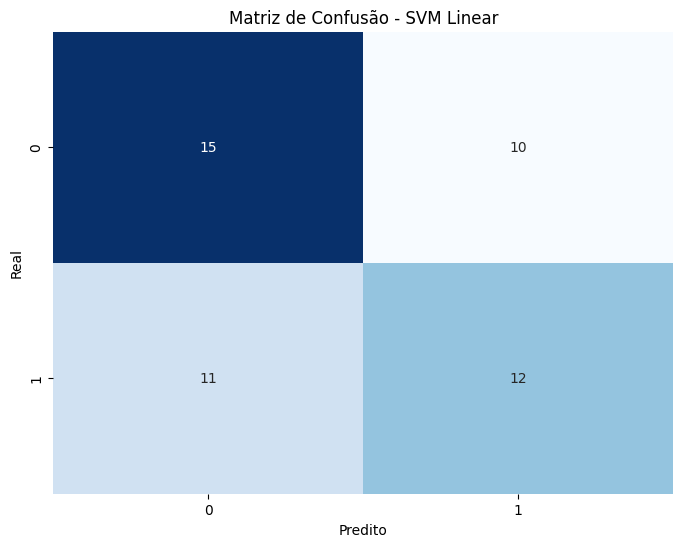

              precision    recall  f1-score   support

           0       0.58      0.60      0.59        25
           1       0.55      0.52      0.53        23

    accuracy                           0.56        48
   macro avg       0.56      0.56      0.56        48
weighted avg       0.56      0.56      0.56        48



In [ ]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Instanciar o modelo SVM
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='accuracy')

In [ ]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        25
           1       0.57      0.74      0.64        23

    accuracy                           0.60        48
   macro avg       0.62      0.61      0.60        48
weighted avg       0.62      0.60      0.60        48



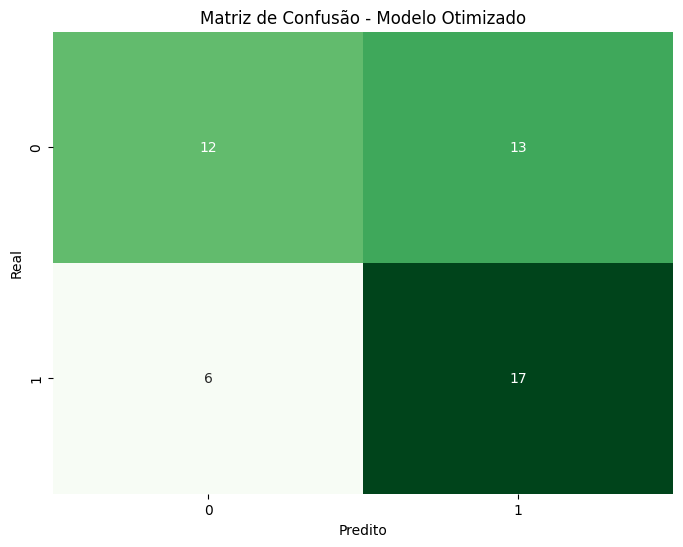

              precision    recall  f1-score   support

           0       0.67      0.48      0.56        25
           1       0.57      0.74      0.64        23

    accuracy                           0.60        48
   macro avg       0.62      0.61      0.60        48
weighted avg       0.62      0.60      0.60        48



In [ ]:
# Previsões com o modelo otimizado
grid_predictions = grid.predict(X_test_scaled)

# Matriz de confusão e relatório de classificação
conf_matrix_grid = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_grid, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusão - Modelo Otimizado')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, grid_predictions))

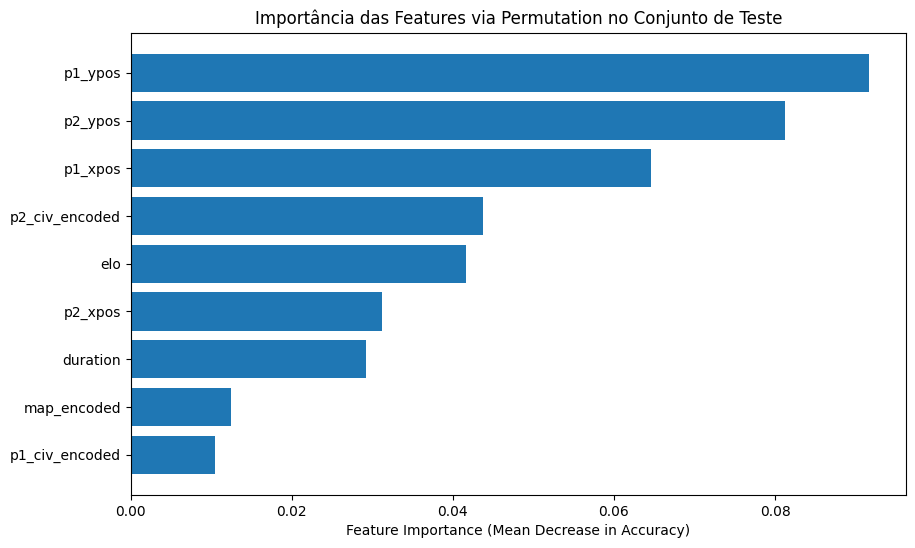

In [ ]:
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance (Mean Decrease in Accuracy)')
plt.title('Importância das Features via Permutation no Conjunto de Teste')
plt.show()